In [29]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

# Tries

A [trie](https://en.wikipedia.org/wiki/Trie) is a data structure that implements the abstract data type of a *dictionary* in the case that the keys are strings.
The set $\mathbb{T}$ of all tries is defined inductively using the constructor 
$$ \texttt{Trie}: \texttt{Value} \times \texttt{List}(\Sigma) \times\texttt{List}(\mathbb{T}) \rightarrow \mathbb{T}. $$ 
Here $\Sigma$ is the *alphabet*, i.e. the set of characters.
The inductive definition of the set $\mathbb{T}$ has only a single clause: If
  - $v \in \texttt{Value} \cup \{\Omega\}$,
  - $C\!s = [c_1, \cdots, c_n] \in \texttt{List}(\Sigma)$ is a list of different characters of length $n$ and
  - $T\!s = [t_1, \cdots, t_n] \in \texttt{List}(\mathbb{T})$ is a list of tries of the same length $n$, 

then we have 
$$ \texttt{Trie}(v, C\!s, T\!s) \in \mathbb{T}. $$  

The class `Trie` defined below implements *tries*.  An object $t$ of the class `Trie` represents the *trie*
$$ \texttt{Trie}(t.\texttt{mValue}, t.\texttt{mChars}, t.\texttt{mTries}). $$
The constructor `__init__` creates an empty *trie*.

In [30]:
class Trie:
    def __init__(self):
        self.mValue  = None
        self.mChars  = []
        self.mTries  = []
        self.mParent = '' # only used by graphviz

In order to specify the meaning of the class `Trie` we define the function `find`,
which can be used to re<u>trie</u>ve the values stored in a trie.
This function has the signature
$$ \texttt{find}: \mathbb{T} \times \Sigma^* \rightarrow \texttt{Value} \cup \{ \Omega\}. $$
For a trie $t$ and a string $s$, the expression $t.\texttt{find}(s)$ returns the
value that is associated with the key $s$ in the trie $t$.  The expression
$\texttt{Trie}(v,C\!s,T\!s).\texttt{find}(s)$ is defined by induction on the length of the  string $s$:
  - $\texttt{Trie}(v, C\!s, T\!s).\texttt{find}(\varepsilon) = v$.
  
    The value associated with the empty string $\varepsilon$ is stored at the root of the trie.
  - $c = c_i \rightarrow 
     \texttt{Trie}(v, [c_1, \cdots, c_n], [t_1, \cdots, t_n]).\texttt{find}(cr) = t_i.\texttt{find}(r)
    $
    
    The trie $\texttt{Trie}(v, [c_1, \cdots, c_n], [t_1, \cdots, t_n])$ associates a value with
    the key $cr$ if the list $[c_1, \cdots, c_n]$ has a position $i$ such that $c$ equals $c_i$
    and, furthermore, the trie  $t_i$ associates a value with the key  $r$.
  - $ c \not\in C\!s \rightarrow
     \texttt{Trie}(v, C\!s, T\!s).\texttt{find}(cr) = \Omega
    $

    If $c$ does not occur in the list $C\!s$, then the trie $\texttt{Trie}(v, C\!s, T\!s)$ does not store a value for
    the key $cr$.

The predefined function `enumerate` takes a list and returns a list of pairs, where the first element of the pair
is a number starting from `0`, while the second element is the corresponding element from the list.  The following 
example shows how this works.

In [31]:
list(enumerate(['a', 'b', 'c']))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [32]:
def find(self, s):
    if s == '':
        return self.mValue
    c, r = s[0], s[1:]
    for i, ci in enumerate(self.mChars):
        if c == ci:
            return self.mTries[i].find(r)
    return None # not necessary

Trie.find = find
del find

The signature of the method $\texttt{insert}$ is given as follows:
$$ \texttt{insert}: \mathbb{T} \times \Sigma^* \times \texttt{Value} \rightarrow \mathbb{T}. $$
The result of evaluating 
$$ \texttt{Trie}(v_1, [c_1, \cdots, c_n], [t_1, \cdots, t_n]).\texttt{insert}(w, v_2) $$
for a string $w\in \Sigma^*$ and a value $v_2 \in \texttt{Value}$ is defined by induction on the
length of $w$:
  - $\texttt{Trie}(v_1,L,T).\texttt{insert}(\varepsilon, v_2) = \texttt{Trie}(v_2,L,T)$.
  
    If a new value $v_2$ is associated with the empty string $\varepsilon$, then the old value
    $v_1$, which had been stored at the root before, is overwritten.
  - $\texttt{Trie}\bigl(v_1,[c_1,\cdots,c_i,\cdots,c_n], [t_1,\cdots,t_i,\cdots,t_n]\bigr).\texttt{insert}(c_ir,v_2) =
     \texttt{Trie}\bigl(v_1,[c_1,\cdots,c_i,\cdots,c_n], [t_1,\cdots,t_i.\texttt{insert}(r,v_2),\cdots,t_n]\bigr)$.

    In order to associate a value $v_2$ with the string $c_ir$ in the trie
    $$ \texttt{Trie}\bigl(v_1,[c_1,\cdots,c_i,\cdots,c_n], [t_1,\cdots,t_i,\cdots,t_n]\bigr) $$ 
    we have to recursively associate the value $v_2$ with the string $r$ in the trie $t_i$.
  - $c \not\in\{c_1,\cdots,c_n\} \;\rightarrow\;\texttt{Trie}\bigl(v_1,[c_1,\cdots,c_n], [t_1,\cdots,t_n]\bigr).\texttt{insert}(cr,v_2) =
     \texttt{Trie}\bigl(v_1,[c_1,\cdots,c_n,c], [t_1,\cdots,t_n,\texttt{Trie}(\Omega,[],[]).\texttt{insert}(r,v_2)]\bigr)$.
      
    If we want to associate a value $v$ with the key $cr$ in the trie
    $\texttt{Trie}\bigl(v_1,[c_1,\cdots,c_n], [t_1,\cdots,t_n]\bigr)$ then, if the character $c$
    does not occur in the list $[c_1,\cdots,c_n]$, we first have to create a new empty trie.
    This trie has the form 
    $$ \texttt{Trie}(\Omega, [], []). $$ 
    Next, we associate the value $v_2$ with the key $r$ in this empty trie.  Finally,
    we append the character $c$ to the end of the list $[c_1,\cdots,c_n]$ and append the trie
    $$ \texttt{Trie}(\Omega, [], []).\texttt{insert}(r,v_2) $$ 
    to the end of the list $[t_1,\cdots,t_n]$.

In [33]:
def insert(self, s, v):
    if s == '':
        self.mValue = v
        return
    c, r = s[0], s[1:]
    for i, ci in enumerate(self.mChars):
        if c == ci:
            self.mTries[i].insert(r, v)
            return
    t = Trie()
    t.insert(r, v)
    t.mParent = c # necessary for visualization
    self.mChars.append(c)
    self.mTries.append(t)
    
Trie.insert = insert
del insert

In order to implement deletion in tries, we need the auxiliary function `isEmpty`.  Its signature is given as
$$ \texttt{isEmpty}: \mathbb{T} \rightarrow \mathbb{B}. $$
For a trie $t$, we have $t.\texttt{isEmpty}() = \texttt{True}$ if and only if the trie $t$ does not
store any key.  The following formula specifies the function $\texttt{isEmpty}$:
$$ \texttt{Trie}(v, C, T).\texttt{isEmpty}() = \mathtt{True} \Leftrightarrow v = \Omega \wedge C = []. $$
Note that the condition $C = []$ implies $T = []$. 

In [34]:
def isEmpty(self):
    return self.mValue == None and self.mChars == []

Trie.isEmpty = isEmpty
del isEmpty

For a trie  $t \in \mathbb{T}$ and a string $w \in \Sigma^*$ the value $t.\texttt{delete}(w)$
is defined by induction on the length of  $w$.
  - $\texttt{Trie}(v,C,T).\texttt{delete}(\varepsilon) = \texttt{Trie}(\Omega,C,T)$

    The value that is associated with the empty  string $\varepsilon$ is stored at the root of the
    trie where is can be deleted without further ado.
  - $\begin{array}[t]{ll}
     t_i.\texttt{delete}(r).\texttt{isEmpty}()   & \rightarrow \\
     \texttt{Trie}(v, [c_1,\cdots,c_i,\cdots,c_n],[t_1,\cdots,t_i,\cdots,t_n]).\texttt{delete}(c_ir) 
     & = \\
     \qquad 
     \texttt{Trie}(v, [c_1,\cdots,c_{i-1},c_{i+1},\cdots,c_n],[t_1,\cdots,t_{i-1},t_{i+1},\cdots,t_n]).
     \end{array}
    $

    If  the key that is to be deleted starts with the character $c_i$ and if deletion of  the key
    $r$ in the $i$th  trie $t_i$ yields an empty
    trie, then both the $i^\mathrm{th}$ character $c_i$ and the $i^\mathrm{th}$ trie $t_i$ are deleted.
  - $\begin{array}[t]{ll}
     \neg t_i.\texttt{delete}(r).\texttt{isEmpty}()   & \rightarrow \\
     \texttt{Trie}(v, [c_1,\cdots,c_i,\cdots,c_n],[t_1,\cdots,t_i,\cdots,t_n]).\texttt{delete}(c_ir) 
     & = \\
     \qquad \texttt{Trie}(v, [c_1,\cdots,c_i,\cdots,c_n],[t_1,\cdots,t_i.\texttt{delete}(r),\cdots,t_n]).
     \end{array}
    $

    If  the key that is to be deleted starts with the character $c_i$ and if deletion of  the key
    $r$ in the $i^\mathrm{th}$  trie $t_i$ yields a non-empty trie, then the key $r$ has to be deleted recursively
    in the trie $t_i$.
  - $c \notin C \rightarrow \texttt{Trie}(v, C, T).\texttt{delete}(cr) =
       \texttt{Trie}(v, C, T)$. 
       
    If  the key that is to be deleted starts with the character $c$ and  $c$ does not occur in
    the list of characters $C$, then the trie does not contain the key $cr$ and therefore there
    is nothing  to do:  The trie is left unchanged.

In [35]:
def delete(self, s):
    if s == '':
        self.mValue = None
        return
    c, r = s[0], s[1:]
    for i, ci in enumerate(self.mChars):
        if c == ci:
            self.mTries[i].delete(r)
            if self.mTries[i].isEmpty():
                self.mChars.pop(i)
                self.mTries.pop(i)
            return
        
Trie.delete = delete
del delete

# String Completion

In order to implement string completion we define the function `allKeys`, which
has the following signature:
$$\texttt{allKeys}: \mathbb{T} \times \Sigma^* \rightarrow \texttt{Set}(\Sigma^*)$$
Given a trie $t$ and a string $p$, the function $t.\texttt{allKeys}(p)$ computes the set of all strings that
are stored as keys in the trie $t$.  Furthermore, the string $p$ is added as a prefix to all these string.
Therefore we specify the semantics of the function $\texttt{allKeys}$ as follows:
$$ t.\texttt{allKeys}(p) = \{ p+w \mid w \in t \}. $$
Here, $p+w$ denotes the concatenation of the strings $p$ and $w$ and the expression $w \in t$ is true iff 
$t.\texttt{find}(w) \not= \Omega$.

Given a trie $t$, the value $t.\texttt{allKeys}(p)$ is computed by induction on $t$.  There are two cases:
- $\texttt{Trie}(\Omega, [c_1, \cdots, c_n], [t_1,\cdots,t_n]).\texttt{allKeys}(p) = 
   \bigcup\limits_{i=1}^n t_i.\texttt{allKeys}(p+c_i) 
  $,
- $v \not= \Omega \rightarrow 
   \texttt{Trie}(v, [c_1, \cdots, c_n], [t_1,\cdots,t_n]).\texttt{allKeys}(p) = 
   \{p\} \cup \bigcup\limits_{i=1}^n t_i.\texttt{allKeys}(p+c_i) 
  $.

In [36]:
def allKeys(self, prefix=''):
    Result = set()
    if self.mValue != None:
        Result.add(prefix)
    for i, ci in enumerate(self.mChars):
        Result |= self.mTries[i].allKeys(prefix + ci)
    return Result

Trie.allKeys = allKeys
del allKeys

Next, we specify the auxiliary function `replacePrefix` that has the following signature:
$$ \texttt{replacePrefix}: \mathbb{T} \times \Sigma^* \times \Sigma^* \rightarrow \texttt{Set}(\Sigma^*) $$
Given a trie $t$, a string $s$, and a string $p$, it returns the set of all strings that are used as keys in $t$
and, furthermore, have the prefix $s$.  Additionally, it replaces the prefix $s$ with the string $p$.  Therefore
we have
$$ t.\texttt{replacePrefix}(s, p) = \bigl\{ p+r \mid s + r \in t \bigr\}. $$
The second argument $p$ is needed in order to make the inductive definition of the function
`replacePrefix` work out.  This definition is given next:
- $t.\texttt{replacePrefix}(\varepsilon, p) = t.\texttt{allKeys}(p)$,
- $\texttt{Trie}\bigl(v, [c_1, \cdots, c_n], [t_1,\cdots,t_n]\bigr).\texttt{replacePrefix}(c_ir, p) = 
   t_i.\texttt{replacePrefix}(r, p) 
  $
- $c \not\in C\!s \rightarrow \texttt{Trie}(v, C\!s, T\!s).\texttt{replacePrefix}(cr, p) = \{\}$.

In [37]:
def replacePrefix(self, s, p):
    if s == '':
        return self.allKeys(p)
    c, r = s[0], s[1:]
    for i, ci in enumerate(self.mChars):
        if c == ci:
            return self.mTries[i].replacePrefix(r, p)
    return set()

Trie.replacePrefix = replacePrefix
del replacePrefix

Finally, we specify the function 
$$\texttt{findPrefix}:\mathbb{T} \times \Sigma^* \rightarrow \texttt{Set}(\Sigma^*)$$
so that given a trie $T$ and a prefix $p$, the expression $T.\texttt{findPrefix}(p)$ finds all
strings $s \in T$ that have the prefix $p$, i.e. that can be written in the form $s=p+r$:
$$ T.\texttt{findPrefix}(p) = \bigl\{ p+r \mid p+r \in T \bigr\}. $$
Having defined the auxiliary function `replacePrefix`, the function `findPrefix` can be
implemented as follows:
$$ T.\texttt{findPrefix}(s) = T.\texttt{replacePrefix}(s, s). $$

In [38]:
def findPrefix(self, s):
    return self.replacePrefix(s, s)

Trie.findPrefix = findPrefix
del findPrefix

# Graphical Representation via GraphViz

In [39]:
import graphviz as gv

In [40]:
def toDot(self):
    Trie.sTrieCount = 0 # this is a static variable of the class Trie
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    TrieDict = {}
    self._assignIDs(TrieDict)
    for id, t in TrieDict.items():
        if t.mValue != None:
            dot.node(id, label='{' + t.mParent + '|' + str(t.mValue) + '}')
        else:
            dot.node(id, label=t.mParent)
    for id, t in TrieDict.items():
        for x in t.mTries:
            dot.edge(id, x.mID)
    return dot

Trie.toDot = toDot
del toDot

In [41]:
def _assignIDs(self, TrieDict):
    Trie.sTrieCount += 1
    self.mID = str(Trie.sTrieCount)
    TrieDict[self.mID] = self
    for t in self.mTries:
        t._assignIDs(TrieDict) 
    
Trie._assignIDs = _assignIDs
del _assignIDs

# Testing

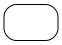

In [42]:
t = Trie()
t.toDot()

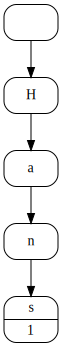

In [43]:
t.insert("Hans", 1)
t.toDot()

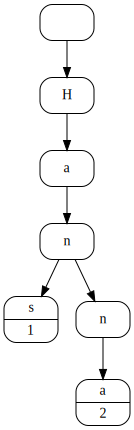

In [44]:
t.insert("Hanna", 2)
t.toDot()

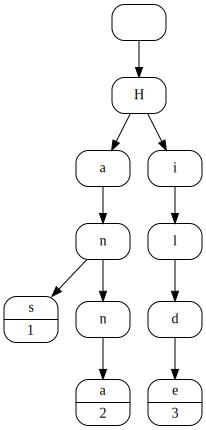

In [45]:
t.insert("Hilde", 3)
t.toDot()

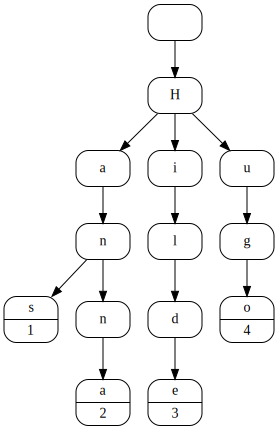

In [46]:
t.insert("Hugo", 4)
t.toDot()

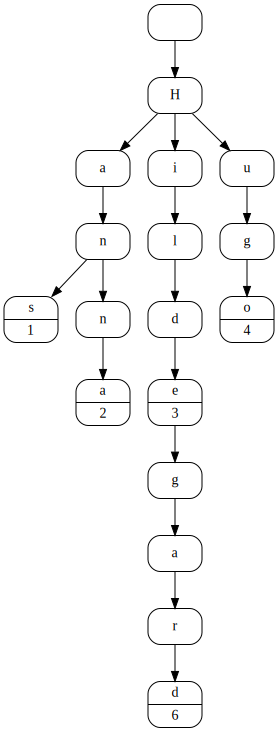

In [47]:
t.insert('Hildegard', 6)
t.toDot()

In [48]:
t.findPrefix('Hi')

{'Hilde', 'Hildegard'}

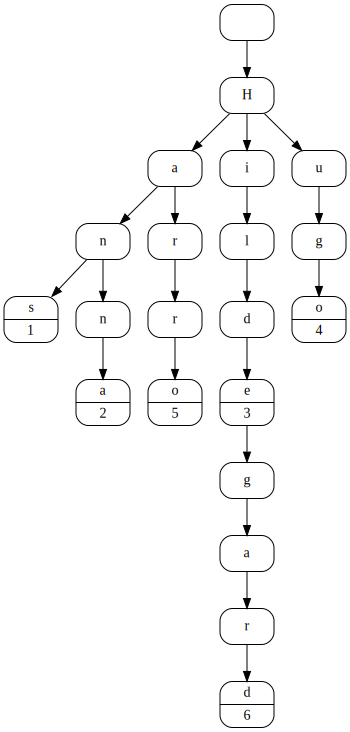

In [49]:
t.insert("Harro", 5)
t.toDot()

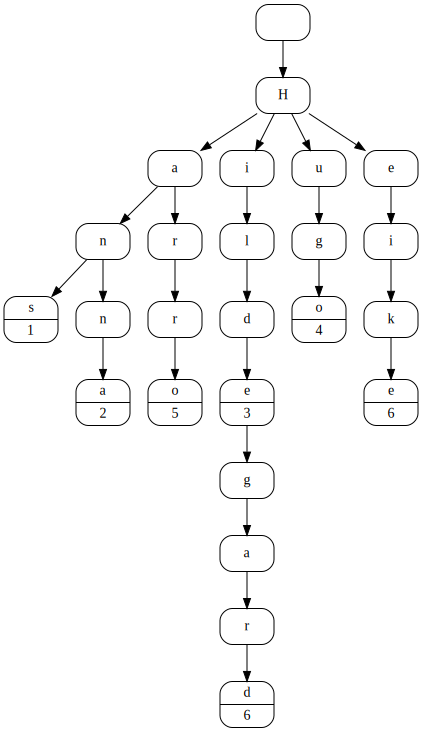

In [50]:
t.insert("Heike", 6)
t.toDot()

In [51]:
t.allKeys('abc_')

{'abc_Hanna',
 'abc_Hans',
 'abc_Harro',
 'abc_Heike',
 'abc_Hilde',
 'abc_Hildegard',
 'abc_Hugo'}

In [52]:
t.replacePrefix('H', 'X')

{'Xanna', 'Xans', 'Xarro', 'Xeike', 'Xilde', 'Xildegard', 'Xugo'}

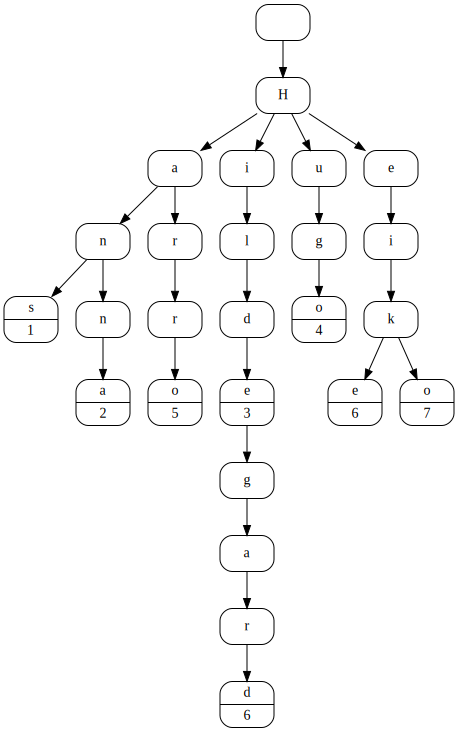

In [53]:
t.insert("Heiko", 7)
t.toDot()

In [54]:
t.find('Hilde')

3

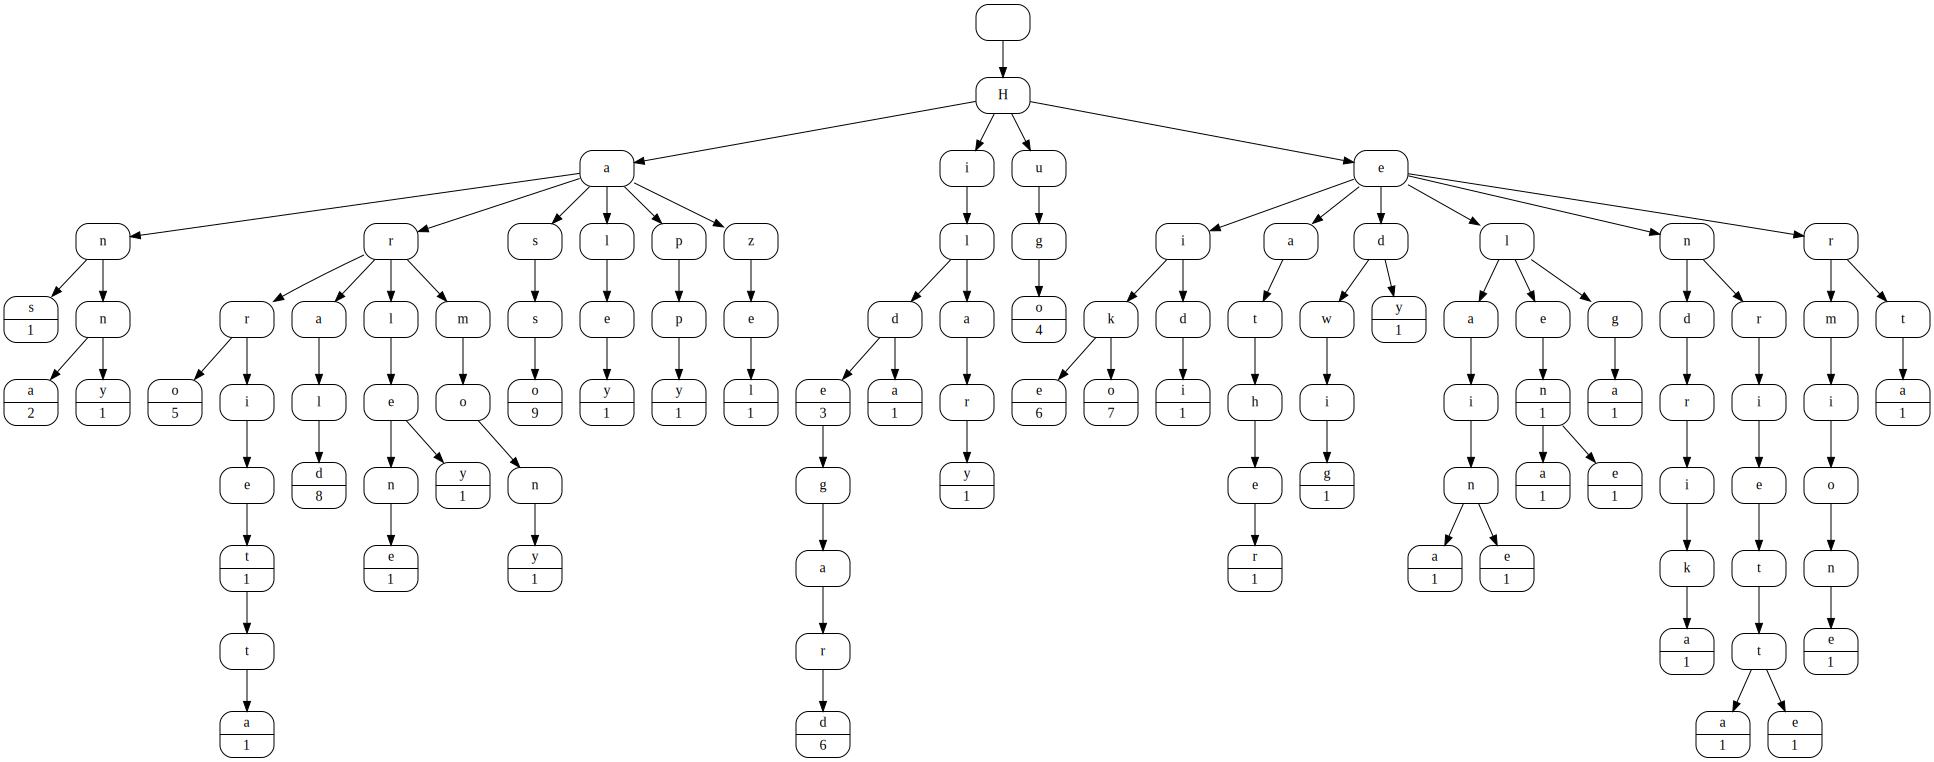

In [55]:
t.insert("Harald", 8)
t.insert("Hasso", 9)
t.insert("Haley", 1)
t.insert("Hanny", 1)
t.insert("Happy", 1)
t.insert("Harlene", 1)
t.insert("Harley", 1)
t.insert("Harmony", 1)
t.insert("Harriet", 1)
t.insert("Harrietta", 1)
t.insert("Hazel", 1)
t.insert("Heather", 1)
t.insert("Hedwig", 1)
t.insert("Hedy", 1)
t.insert("Heidi", 1)
t.insert("Helaina", 1)
t.insert("Helaine", 1)
t.insert("Helen", 1)
t.insert("Helena", 1)
t.insert("Helene", 1)
t.insert("Helga", 1)
t.insert("Hendrika", 1)
t.insert("Henrietta", 1)
t.insert("Henriette", 1)
t.insert("Hermione", 1)
t.insert("Herta", 1)
t.insert("Hilary", 1)
t.insert("Hilda", 1)
t.toDot()

In [ ]:
t.findPrefix('Hea')

In [ ]:
t.findPrefix('Hel')

In [ ]:
t.delete('Hanny')
t.toDot()

In [ ]:
t.allKeys()

In [ ]:
t.delete("Hans")
t.delete("Hanna")
t.delete("Hilde")
t.delete("Hugo")
t.delete("Harro")
t.delete("Heike")
t.delete("Heiko")
t.delete("Harald")
t.delete("Hasso")
t.delete("Haley")
t.delete("Hanny")
t.delete("Happy")
t.delete("Harlene")
t.delete("Harley")
t.delete("Harmony")
t.delete("Harriet")
t.delete("Harrietta")
t.delete("Hazel")
t.delete("Heather")
t.delete("Hedwig")
t.delete("Hedy")
t.delete("Heidi")
t.delete("Helaina")
t.delete("Helaine")
t.delete("Helen")
t.delete("Helena")
t.delete("Helene")
t.delete("Helga")
t.delete("Hendrika")
t.delete("Henrietta")
t.delete("Henriette")
t.delete("Hermione")
t.delete("Herta")
t.delete("Hilary")
t.delete("Hilda")
t.delete("Hildegard")
t.toDot()

In order to make sure that everything works, let us compute the prime numbers less than $100$.  
Note that we have to convert numbers to strings in order to be able to use tries.

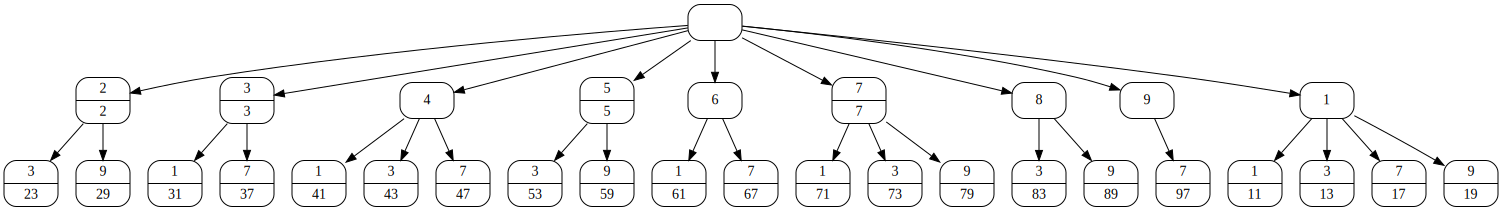

In [27]:
S = Trie()
for i in range(2, 101):
    S.insert(str(i), i)
for i in range(2, 51):
    for j in range(i, 100 // i + 1):
        S.delete(str(i * j))
S.toDot()

Let us compute all key stored in this trie, as these are the prime numbers.

In [28]:
print(sorted([int(p) for p in S.allKeys()]))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
